# Problem 1:
*See written work for solution.*

# Problem 2:

**a)** The effective impedance of the given circuit is
$$
\frac {1}{Z_{eff}} = \frac {1}{Z_C} + \frac{1}{Z_L} \\
\frac{1}{Z_{eff}} = \frac{Z_L + Z_C}{Z_LZ_C} \\
Z_{eff} = \frac {Z_LZ_C}{Z_L+Z_C}
$$

Within the context of $V_{out}$, this can be written as
$$
V_{out} = \frac{Z_{eff}}{R+Z_{eff}}
$$

which is be used to plot $V_{out}$ against the frequency $\omega$. When plotting the phase, consider the complex plane where the angle above the real axis is the phase shift $\Phi$. To find the angle $\Phi$, use

$$
\Phi = arctan(\frac{V_{real}}{V_{imag}})
$$

The following code plots the two graphs. 

**b)** At the frequency value $\omega = \frac{1}{\sqrt{LC}}$, this frequency is the resonance frequency. This will occur at the maximum value of the voltage. This should be observed in the *Voltage vs. Frequency* graph. 

/Users/brash/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/brash/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


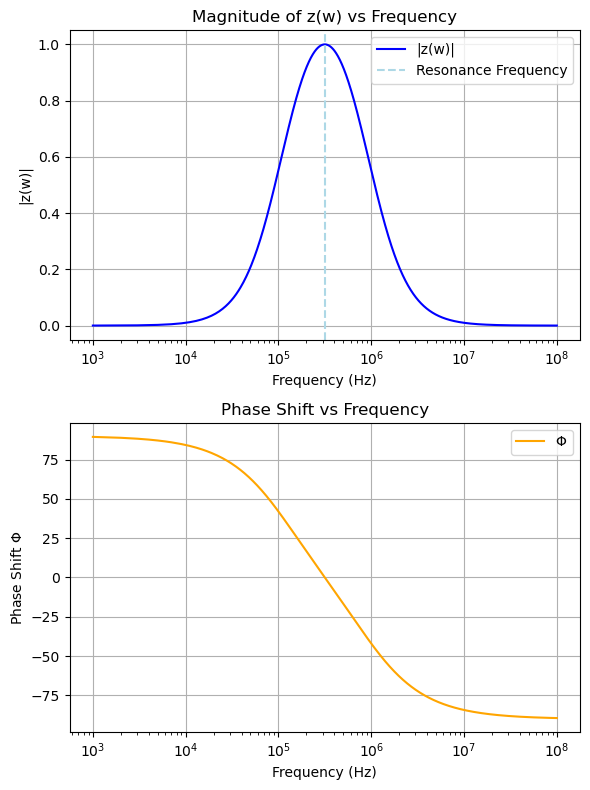

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the values of L, C, R, and j
L = 10e-6  # Inductance in Henry
C = 1e-6   # Capacitance in Farad
R = 1      # Resistance in Ohms
j = 1j     # Imaginary unit

# Define the function V_out(w)
def v_out(w):
    z_c = 1 / (j * w * C)
    z_l = j * w * L
    z_eff = z_c * z_l / (z_c + z_l)
    value = (z_eff / (R + z_eff))
    return value

# Calculate the resonance frequency
resonance_freq = np.sqrt(1 / (L * C))

# Generate frequency values (w)
w_values = np.linspace(1e3, 1e8, 100000)

# Calculate the corresponding magnitude of z(w) values
v_mag = v_out(w_values)

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(6, 8))

# Plot the magnitude graph
axs[0].plot(w_values, v_mag, label='|z(w)|', color='blue')
axs[0].axvline(x=resonance_freq, linestyle='--', color='lightblue', label='Resonance Frequency')
axs[0].set_title('Magnitude of z(w) vs Frequency')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('|z(w)|')
axs[0].set_xscale('log')
axs[0].grid(True)
axs[0].legend()

# Use the lists imag and real to plot the phase angles
imag = np.imag(v_mag)
real = np.real(v_mag)
phase = np.arctan2(imag, real) * (180 / np.pi)  # Convert radians to degrees

# Plot the phase shift
axs[1].plot(w_values, phase, label='$\Phi$', color='orange')
axs[1].set_title('Phase Shift vs Frequency')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Phase Shift $\Phi$')
axs[1].set_xscale('log')
axs[1].grid(True)
axs[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# Problem 3:

See written work for the solution of solving the coupled differential equations. The solutions are
$$
x(t) = \frac 1 2 e^{-2t} + \frac 1 2 e^{6t} \\
y(t) = - \frac {1}{8} e^{-2t} + \frac 1 8 e^{6t}
$$ 

**d) Plot the solution to the system of differential equations.**

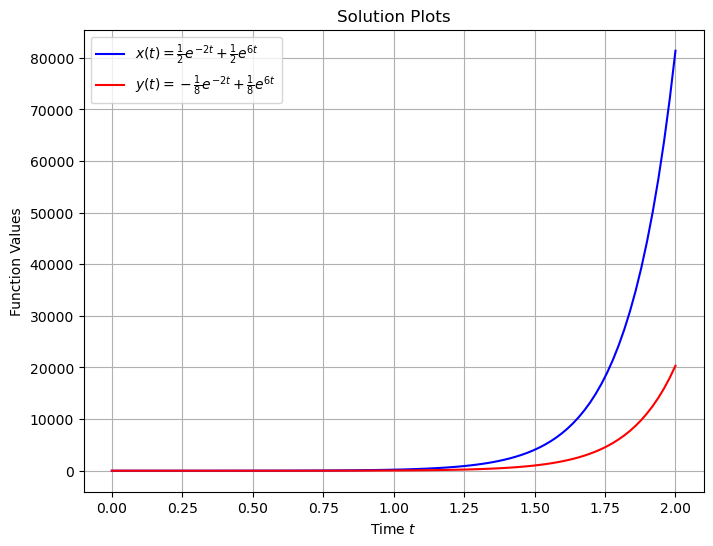

In [2]:
# Define the time values
t = np.linspace(0, 2, 100)

# Define the equations for x(t) and y(t)
x = 0.5 * np.exp(-2*t) + 0.5 * np.exp(6*t)
y = -0.125 * np.exp(-2*t) + 0.125 * np.exp(6*t)

# Plot the curves
plt.figure(figsize=(8, 6))
plt.plot(t, x, label='$x(t) = \\frac{1}{2} e^{-2t} + \\frac{1}{2} e^{6t}$', color='blue')
plt.plot(t, y, label='$y(t) = -\\frac{1}{8} e^{-2t} + \\frac{1}{8} e^{6t}$', color='red')
plt.title('Solution Plots')
plt.xlabel('Time $t$')
plt.ylabel('Function Values')
plt.legend()
plt.grid(True)
plt.show()


# Problem 4:


__Solution:__

See the written out solution to find that the fourier series of $ y=|x| $ where $ -\pi < x < \pi $ is 

$$
|x| = \frac {\pi}{2} + \sum_{n = 1}^{\infty} \frac{2}{\pi n^2}((-1)^n-1)cos(nx)
$$

**b) Plot the function and the first 5 non-zero terms of the Fourier series.**

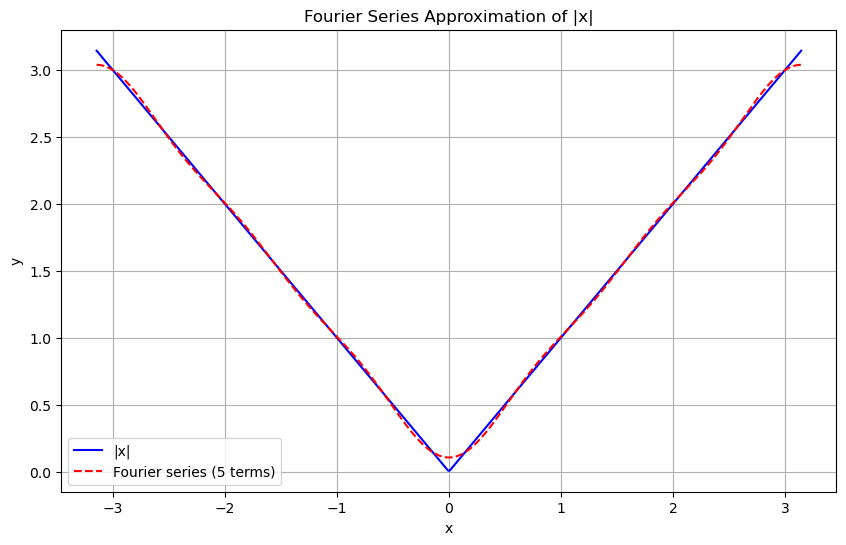

In [3]:
# Define the Fourier series function for |x|
def fourier_series(x, terms=5):
    result = np.pi / 2
    for n in range(1, terms + 1):
        result += (2/(np.pi * n**2) * ((-1) ** n - 1) * np.cos(n * x))
    return result

# Generate x values from -pi to pi
x_values = np.linspace(-np.pi, np.pi, 500)

# Calculate y values for |x| and Fourier series approximation
y_absolute = np.abs(x_values)
y_fourier = [fourier_series(x, terms=5) for x in x_values]

# Plot the functions
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_absolute, label='|x|', color='blue')
plt.plot(x_values, y_fourier, label='Fourier series (5 terms)', linestyle='--', color='red')
plt.title('Fourier Series Approximation of |x|')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


This is a rough estimation of the original function, let's use more terms to get a better visualization of the estimation. 

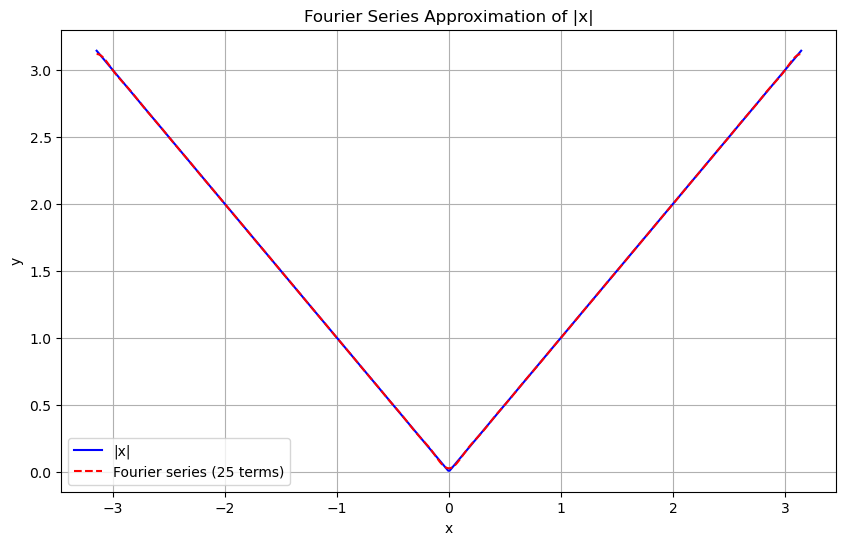

In [4]:
# Calculate y values for Fourier series approximation with n = 25
y_fourier_2 = [fourier_series(x, terms=25) for x in x_values]

# Plot the functions
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_absolute, label='|x|', color='blue')
plt.plot(x_values, y_fourier_2, label='Fourier series (25 terms)', linestyle='--', color='red')
plt.title('Fourier Series Approximation of |x|')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

This is a much better estimation of the original function, but notice the behavior of the function at $x = 0$...

__c) What is the value of the jump discontinuity (using a 5 non-zero term Fourier series)?__ 

In the written solution, it is proven that the value of the jump discontinuity is $\frac{\pi^2}{4}$. The following code estimates the value of the jump discontinuity for $n$ terms, where in this case, $n=5$. 


In [5]:
# Define a function that calculates the estimation to n terms
def estimate(n):
    estimation = 0
    for k in range(1, n+1):
        estimation += 1 / ((2*k - 1) ** 2)
    return estimation

num_terms = 5
print(f'The fourier estimation of the function |x| to {num_terms} terms is {estimate(num_terms)}.')

The fourier estimation of the function |x| to 5 terms is 1.183864953388763.


**d) How many non-zero terms do you need to include in the Fourier series to have the jump discontinuity at $x=0$ to be less than $0.01$?**

The percent error of any estimation can be found using 

$$
error = \frac {|E - T|}{T}
$$

where $E$ is the estimated value and $T$ is the theoretical value one is trying to reach. Rearrange this to find that

$$
T \cdot error = E-T \\ 
T(error + 1) = E
$$

The following code uses this final version of the formula reach the desired error value, while keep track of the number of terms it takes to get there. 

In [6]:
#def num_of_terms(err):
#    value = ((np.pi ** 2) / 4) * (err + 1)
#    theo = (np.pi ** 2) / 4
#    diff = np.abs(value - theo)
#    guess = 0
#    n = 1
#    
#    while np.abs(guess - theo) > diff:
#        guess += 1 / ((2*n - 1) ** 2)
#        n += 1
#
#error = 0.01
#print(f'The number of terms required to minimize the error to {error} is {num_of_terms(0.01)}')

The code in the above cell was my initial strategy to calculate the number of terms required to reach a desired error value. But as I ran this code, I noticed an issue where the series seems to converge to a value around 1.233 and the code runs infinitely. I tried to fix this issue but I was unable to. I did some research to figure out why this was not working and I believe that something called Gibbs Phenomenon is occurring. 

When estimating the value of a jump discontinuity of a function, the Fourier series either over estimates or under estimates the function value. Gibbs Phenomenon explains that as more and more terms are used to approximate the value at the jump discontinuity, the error of the estimation has a limitation. The infinite series converges almost everywhere except for the points of discontinuity. 

I believe this is happening to my code and to this series around the jump discontinuity at x = 0. 

I found this information for Gibbs Phenomenon here: https://en.wikipedia.org/wiki/Gibbs_phenomenon


# Problem 5:
*See written work for full solution.*